# Random Forest

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif

### Model 1
#### Read CSV

In [2]:
train_m1 = pd.read_csv('../../../../Data_AA2/train_m1.csv', sep = ',')
train_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,-0.756929,-1.925779,0.580938,-0.515445,0.939376,-0.453565,-0.763196,1.192581,0.001762,...,-0.561357,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.259352,0.395979,0
1,0.37521,1.471189,-0.283258,-0.824024,-0.515445,0.939376,-0.453565,1.310279,-0.098471,-0.713715,...,0.148956,0.196894,-0.348973,0.188003,0.837519,1.529013,-0.281151,0.769787,0.843536,0
2,0.37521,0.078615,-0.283258,1.049258,-0.515445,0.939376,-0.453565,-0.763196,-1.389523,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.773829,0.843536,0
3,0.37521,-0.756929,-0.283258,-0.824024,-0.515445,-1.090085,-0.453565,1.310279,1.192581,1.432715,...,-0.206200,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.284758,0.395979,0
4,0.37521,-1.035444,-1.925779,1.049258,1.938451,0.939376,-0.453565,1.310279,0.762230,-0.713715,...,0.859269,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0


In [3]:
test_m1 = pd.read_csv('../../../../Data_AA2/test_m1.csv', sep = ',')
test_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,1.471189,-0.283258,0.580938,-0.515445,0.939376,-0.453565,1.310279,0.762230,0.717238,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0
1,0.37521,0.914159,-1.925779,-0.355703,-0.515445,-1.090085,-0.453565,1.310279,0.762230,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.709736,0.329470,0
2,0.37521,1.471189,-0.283258,0.580938,1.938451,0.939376,-0.453565,1.310279,0.762230,-1.429191,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.711468,0.329470,0
3,0.37521,-0.756929,1.359263,-1.760665,-0.515445,-1.090085,-0.453565,-0.763196,0.762230,1.432715,...,-0.561357,0.196894,1.662067,-2.562036,-1.202130,-1.180338,-1.231682,-1.354522,-0.943918,0
4,0.37521,-1.035444,-0.283258,1.049258,1.938451,0.939376,-0.453565,-0.763196,-1.389523,0.717238,...,0.148956,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.771519,0.843536,0


In [4]:
#get target
train_m1_target = train_m1['y']
train_m1 = train_m1.drop(columns=['y'])

In [5]:
#get target
test_m1_target = test_m1['y']
test_m1 = test_m1.drop(columns=['y'])

### Check for lower errors

In [6]:
error_rate = []

for i in tqdm(range(1,200)):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(train_m1,train_m1_target)
    predictions = clf.predict(test_m1)
    error_rate.append(np.mean(predictions != test_m1_target))

100%|████████████████████████████████████████████████████████████████████████████████| 199/199 [08:38<00:00,  2.60s/it]


Text(0, 0.5, 'Error Rate')

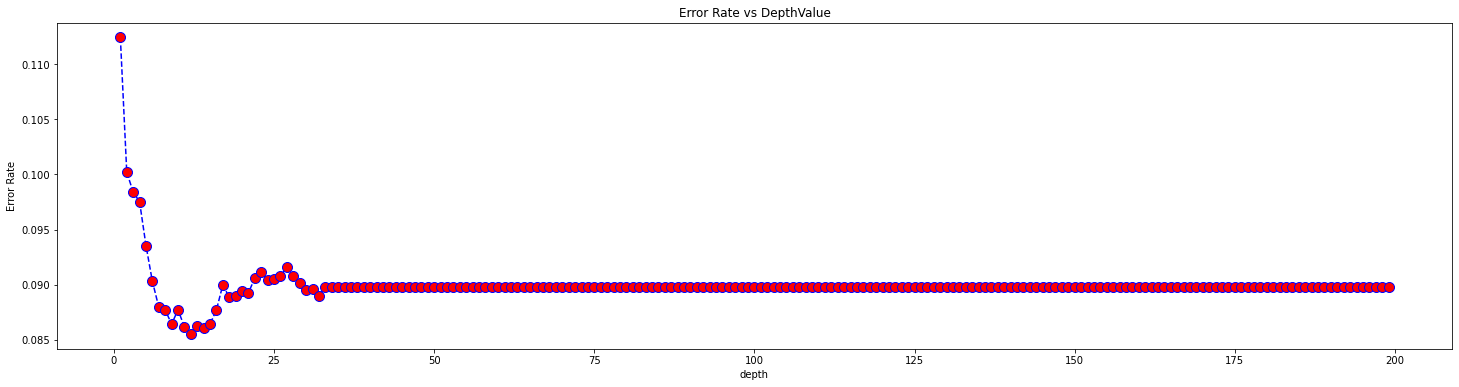

In [9]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [18]:
# Create the parameter grid based on the results of random search 
parameters = {
    'bootstrap': [True],
    'max_depth': [11,12,13,14],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the model
rf_model = RandomForestClassifier()

# Best model
opt_model_rf = GridSearchCV(rf_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_rf.fit(train_m1, train_m1_target)

print (opt_model_rf.best_estimator_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 1/5; 1/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV 2/5; 1/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 2/5; 1/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV 3/5; 1/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 3/5; 1/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV 4/5; 1/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100


[CV 1/5; 7/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV 2/5; 7/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 2/5; 7/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.4s
[CV 3/5; 7/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 3/5; 7/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.5s
[CV 4/5; 7/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 4/5; 7/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.3s
[CV 5/5; 7/288] START bootstrap=True, m

[CV 1/5; 13/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.1s
[CV 2/5; 13/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 2/5; 13/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.1s
[CV 3/5; 13/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 3/5; 13/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.1s
[CV 4/5; 13/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 4/5; 13/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV 5/5; 13/288] START bootstrap=True, 

[CV 2/5; 19/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV 3/5; 19/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 3/5; 19/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.1s
[CV 4/5; 19/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 4/5; 19/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV 5/5; 19/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 5/5; 19/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV 1/5; 20/288] START bootstrap

[CV 2/5; 25/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 3/5; 25/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 3/5; 25/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 4/5; 25/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 4/5; 25/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 5/5; 25/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 5/5; 25/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.1s
[CV 1/5; 26/288] START bootstrap=True, 

[CV 2/5; 31/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV 3/5; 31/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 3/5; 31/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV 4/5; 31/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 4/5; 31/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.5s
[CV 5/5; 31/288] START bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 5/5; 31/288] END bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV 1/5; 32/288] START bootstrap

[CV 2/5; 37/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 3/5; 37/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 3/5; 37/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 4/5; 37/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 4/5; 37/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 5/5; 37/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 5/5; 37/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 1/5; 38/288] START bootstrap=True, 

[CV 2/5; 43/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.6s
[CV 3/5; 43/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 3/5; 43/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV 4/5; 43/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 4/5; 43/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV 5/5; 43/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 5/5; 43/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   3.8s
[CV 1/5; 44/288] START bootstrap

[CV 2/5; 49/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 3/5; 49/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 3/5; 49/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 4/5; 49/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 4/5; 49/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.1s
[CV 5/5; 49/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 5/5; 49/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 1/5; 50/288] START bootstrap=True, 

[CV 2/5; 55/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.5s
[CV 3/5; 55/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 3/5; 55/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.6s
[CV 4/5; 55/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 4/5; 55/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV 5/5; 55/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 5/5; 55/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.8s
[CV 1/5; 56/288] START bootstrap

[CV 2/5; 61/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.8s
[CV 3/5; 61/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 3/5; 61/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV 4/5; 61/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 4/5; 61/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV 5/5; 61/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 5/5; 61/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 1/5; 62/288] START bootstrap=True, 

[CV 2/5; 67/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.0s
[CV 3/5; 67/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 3/5; 67/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.0s
[CV 4/5; 67/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 4/5; 67/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.4s
[CV 5/5; 67/288] START bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 5/5; 67/288] END bootstrap=True, max_depth=11, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.3s
[CV 1/5; 68/288] START bootstrap

[CV 2/5; 73/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.1s
[CV 3/5; 73/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 3/5; 73/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.1s
[CV 4/5; 73/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 4/5; 73/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 5/5; 73/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 5/5; 73/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.1s
[CV 1/5; 74/288] START bootstrap=True, 

[CV 2/5; 79/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.0s
[CV 3/5; 79/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 3/5; 79/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.7s
[CV 4/5; 79/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 4/5; 79/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   5.3s
[CV 5/5; 79/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 5/5; 79/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.2s
[CV 1/5; 80/288] START bootstrap

[CV 2/5; 85/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 3/5; 85/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 3/5; 85/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 4/5; 85/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 4/5; 85/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV 5/5; 85/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 5/5; 85/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 1/5; 86/288] START bootstrap=True, 

[CV 2/5; 91/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.8s
[CV 3/5; 91/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 3/5; 91/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.1s
[CV 4/5; 91/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 4/5; 91/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.2s
[CV 5/5; 91/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 5/5; 91/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.8s
[CV 1/5; 92/288] START bootstrap

[CV 2/5; 97/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 3/5; 97/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 3/5; 97/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 4/5; 97/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 4/5; 97/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV 5/5; 97/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 5/5; 97/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 1/5; 98/288] START bootstrap=True, 

[CV 2/5; 103/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV 3/5; 103/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 3/5; 103/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV 4/5; 103/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 4/5; 103/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV 5/5; 103/288] START bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 5/5; 103/288] END bootstrap=True, max_depth=12, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.8s
[CV 1/5; 104/288] START b

[CV 2/5; 109/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV 3/5; 109/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 3/5; 109/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV 4/5; 109/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 4/5; 109/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV 5/5; 109/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 5/5; 109/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.6s
[CV 1/5; 110/288] START bootstra

[CV 2/5; 115/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.7s
[CV 3/5; 115/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 3/5; 115/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.9s
[CV 4/5; 115/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 4/5; 115/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   5.0s
[CV 5/5; 115/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 5/5; 115/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.8s
[CV 1/5; 116/288] START b

[CV 2/5; 121/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV 3/5; 121/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 3/5; 121/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.7s
[CV 4/5; 121/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 4/5; 121/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.8s
[CV 5/5; 121/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 5/5; 121/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.6s
[CV 1/5; 122/288] START bootstra

[CV 2/5; 127/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.6s
[CV 3/5; 127/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 3/5; 127/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.6s
[CV 4/5; 127/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 4/5; 127/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   5.0s
[CV 5/5; 127/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 5/5; 127/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   5.0s
[CV 1/5; 128/288] START b

[CV 2/5; 133/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV 3/5; 133/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 3/5; 133/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV 4/5; 133/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 4/5; 133/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.6s
[CV 5/5; 133/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 5/5; 133/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV 1/5; 134/288] START bootstra

[CV 2/5; 139/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.7s
[CV 3/5; 139/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 3/5; 139/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.9s
[CV 4/5; 139/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 4/5; 139/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   5.0s
[CV 5/5; 139/288] START bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 5/5; 139/288] END bootstrap=True, max_depth=12, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   5.0s
[CV 1/5; 140/288] START b

[CV 2/5; 145/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV 3/5; 145/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 3/5; 145/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 4/5; 145/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 4/5; 145/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 5/5; 145/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 5/5; 145/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 1/5; 146/288] START bootstra

[CV 2/5; 151/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.4s
[CV 3/5; 151/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 3/5; 151/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.7s
[CV 4/5; 151/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 4/5; 151/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.5s
[CV 5/5; 151/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 5/5; 151/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.0s
[CV 1/5; 152/288] START b

[CV 2/5; 157/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 3/5; 157/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 3/5; 157/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 4/5; 157/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 4/5; 157/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 5/5; 157/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 5/5; 157/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 1/5; 158/288] START bootstra

[CV 2/5; 163/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.0s
[CV 3/5; 163/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 3/5; 163/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.1s
[CV 4/5; 163/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 4/5; 163/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.2s
[CV 5/5; 163/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 5/5; 163/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.0s
[CV 1/5; 164/288] START b

[CV 2/5; 169/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 3/5; 169/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 3/5; 169/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV 4/5; 169/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 4/5; 169/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV 5/5; 169/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 5/5; 169/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV 1/5; 170/288] START bootstra

[CV 2/5; 175/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV 3/5; 175/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 3/5; 175/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.0s
[CV 4/5; 175/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 4/5; 175/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV 5/5; 175/288] START bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 5/5; 175/288] END bootstrap=True, max_depth=13, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.2s
[CV 1/5; 176/288] START b

[CV 2/5; 181/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.9s
[CV 3/5; 181/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 3/5; 181/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.8s
[CV 4/5; 181/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 4/5; 181/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.8s
[CV 5/5; 181/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 5/5; 181/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.8s
[CV 1/5; 182/288] START bootstra

[CV 2/5; 187/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   6.7s
[CV 3/5; 187/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 3/5; 187/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   7.1s
[CV 4/5; 187/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 4/5; 187/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   7.3s
[CV 5/5; 187/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 5/5; 187/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   5.8s
[CV 1/5; 188/288] START b

[CV 2/5; 193/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV 3/5; 193/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 3/5; 193/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV 4/5; 193/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 4/5; 193/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.6s
[CV 5/5; 193/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 5/5; 193/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV 1/5; 194/288] START bootstra

[CV 2/5; 199/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   6.1s
[CV 3/5; 199/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 3/5; 199/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   7.0s
[CV 4/5; 199/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 4/5; 199/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   6.2s
[CV 5/5; 199/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 5/5; 199/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   5.6s
[CV 1/5; 200/288] START b

[CV 2/5; 205/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.8s
[CV 3/5; 205/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 3/5; 205/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.6s
[CV 4/5; 205/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 4/5; 205/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.6s
[CV 5/5; 205/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 5/5; 205/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.6s
[CV 1/5; 206/288] START bootstra

[CV 2/5; 211/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.9s
[CV 3/5; 211/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 3/5; 211/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.8s
[CV 4/5; 211/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 4/5; 211/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   5.2s
[CV 5/5; 211/288] START bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 5/5; 211/288] END bootstrap=True, max_depth=13, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   5.0s
[CV 1/5; 212/288] START b

[CV 2/5; 217/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.7s
[CV 3/5; 217/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 3/5; 217/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 4/5; 217/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 4/5; 217/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 5/5; 217/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 5/5; 217/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 1/5; 218/288] START bootstra

[CV 2/5; 223/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.2s
[CV 3/5; 223/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 3/5; 223/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.0s
[CV 4/5; 223/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 4/5; 223/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.1s
[CV 5/5; 223/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 5/5; 223/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.2s
[CV 1/5; 224/288] START b

[CV 2/5; 229/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV 3/5; 229/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 3/5; 229/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 4/5; 229/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 4/5; 229/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 5/5; 229/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 5/5; 229/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 1/5; 230/288] START bootstra

[CV 2/5; 235/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.4s
[CV 3/5; 235/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 3/5; 235/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.4s
[CV 4/5; 235/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 4/5; 235/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.4s
[CV 5/5; 235/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 5/5; 235/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.3s
[CV 1/5; 236/288] START b

[CV 2/5; 241/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 3/5; 241/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 3/5; 241/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 4/5; 241/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 4/5; 241/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 5/5; 241/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 5/5; 241/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.2s
[CV 1/5; 242/288] START bootstra

[CV 2/5; 247/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.4s
[CV 3/5; 247/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 3/5; 247/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.6s
[CV 4/5; 247/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 4/5; 247/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.8s
[CV 5/5; 247/288] START bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 5/5; 247/288] END bootstrap=True, max_depth=14, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.4s
[CV 1/5; 248/288] START b

[CV 2/5; 253/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 3/5; 253/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 3/5; 253/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 4/5; 253/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 4/5; 253/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 5/5; 253/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 5/5; 253/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 1/5; 254/288] START bootstra

[CV 2/5; 259/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.5s
[CV 3/5; 259/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 3/5; 259/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.0s
[CV 4/5; 259/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 4/5; 259/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.0s
[CV 5/5; 259/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 5/5; 259/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.2s
[CV 1/5; 260/288] START b

[CV 2/5; 265/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 3/5; 265/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 3/5; 265/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 4/5; 265/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 4/5; 265/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV 5/5; 265/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 5/5; 265/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.5s
[CV 1/5; 266/288] START bootstra

[CV 2/5; 271/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.1s
[CV 3/5; 271/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 3/5; 271/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.1s
[CV 4/5; 271/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 4/5; 271/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV 5/5; 271/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 5/5; 271/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.4s
[CV 1/5; 272/288] START b

[CV 2/5; 277/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 3/5; 277/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 3/5; 277/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 4/5; 277/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 4/5; 277/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 5/5; 277/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 5/5; 277/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.3s
[CV 1/5; 278/288] START bootstra

[CV 2/5; 283/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.3s
[CV 3/5; 283/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 3/5; 283/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.3s
[CV 4/5; 283/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 4/5; 283/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV 5/5; 283/288] START bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 5/5; 283/288] END bootstrap=True, max_depth=14, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV 1/5; 284/288] START b

#### Create and fit the model

In [19]:
# Create model with best parameters
rf_best_model = RandomForestClassifier(max_depth=13, max_features=3, min_samples_leaf=3,min_samples_split=8)

# Fit the best model
rf_best_model.fit(train_m1, train_m1_target)
rf_best_model

RandomForestClassifier(max_depth=13, max_features=3, min_samples_leaf=3,
                       min_samples_split=8)

In [20]:
predictions = rf_best_model.predict(test_m1)

# Confusion matrix
confusion = pd.crosstab(test_m1_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0    1    All
Actual                      
0          10733  235  10968
1            831  558   1389
All        11564  793  12357


In [21]:
# Accuracy
score = accuracy_score(test_m1_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.913733


In [22]:
# Report
print(classification_report(test_m1_target,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10968
           1       0.70      0.40      0.51      1389

    accuracy                           0.91     12357
   macro avg       0.82      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [ ]:
# Validate model using best model and cross validation
pecc_rf = cross_val_score(rf_best_model, train_m1, train_m1_target, cv = 5).mean()
pecc_rf

### Model 2
#### Read CSV

In [ ]:
train_m2 = pd.read_csv('../../../../Data_AA2/train_m2.csv', sep = ',')
train_m2.head()

In [ ]:
test_m2 = pd.read_csv('../../../../Data_AA2/test_m2.csv', sep = ',')
test_m2.head()

In [ ]:
#get target
train_m2_target = train_m2['y']
train_m2 = train_m2.drop(columns=['y'])

In [ ]:
#get target
test_m2_target = test_m2['y']
test_m2 = test_m2.drop(columns=['y'])

### Check for lower errors

In [ ]:
error_rate = []

for i in tqdm(range(1,200)):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(train_m2,train_m2_target)
    predictions = clf.predict(test_m2)
    error_rate.append(np.mean(predictions != test_m2_target))

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
parameters = {
    'bootstrap': [True],
    'max_depth': [140, 149],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the model
rf_model = RandomForestClassifier()

# Best model
opt_model_rf = GridSearchCV(rf_model, parameters,  scoring='accuracy', verbose=1)

# Fit the model
opt_model_rf.fit(train_m2, train_m2_target)

print (opt_model_rf.best_estimator_)

#### Create and fit the model

In [ ]:
# Create model with best parameters
rf_best_model = RandomForestClassifier()

# Fit the best model
rf_best_model.fit(train_m2, train_m2_target)
rf_best_model

In [ ]:
predictions = rf_best_model.predict(test_m2)

# Confusion matrix
confusion = pd.crosstab(test_m2_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

In [ ]:
# Accuracy
score = accuracy_score(test_m2_target,predictions)
print('Accuracy:{0:f}'.format(score))

In [ ]:
# Report
print(classification_report(test_m2_target,predictions))

In [ ]:
# Validate model using best model and cross validation
pecc_rf = cross_val_score(rf_best_model, train_m2, train_m2_target, cv = 5).mean()
pecc_rf

### Model 3
#### Read CSV

In [ ]:
train_m3 = pd.read_csv('../../../../Data_AA2/train_m3.csv', sep = ',')
train_m3.head()

In [ ]:
test_m3 = pd.read_csv('../../../../Data_AA2/test_m3.csv', sep = ',')
test_m3.head()

In [ ]:
#get target
train_m3_target = train_m3['y']
train_m3 = train_m3.drop(columns=['y'])

In [ ]:
#get target
test_m3_target = test_m3['y']
test_m3 = test_m3.drop(columns=['y'])

### Check for lower errors

In [ ]:
error_rate = []

for i in tqdm(range(1,200)):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(train_m3,train_m3_target)
    predictions = clf.predict(test_m3)
    error_rate.append(np.mean(predictions != test_m3_target))

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
parameters = {
    'bootstrap': [True],
    'max_depth': [140, 149],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the model
rf_model = RandomForestClassifier()

# Best model
opt_model_rf = GridSearchCV(rf_model, parameters,  scoring='accuracy', verbose=1)

# Fit the model
opt_model_rf.fit(train_m3, train_m3_target)

print (opt_model_rf.best_estimator_)

#### Create and fit the model

In [ ]:
# Create model with best parameters
rf_best_model = RandomForestClassifier()

# Fit the best model
rf_best_model.fit(train_m3, train_m3_target)
rf_best_model

In [ ]:
predictions = rf_best_model.predict(test_m3)

# Confusion matrix
confusion = pd.crosstab(test_m3_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

In [ ]:
# Accuracy
score = accuracy_score(test_m3_target,predictions)
print('Accuracy:{0:f}'.format(score))

In [ ]:
# Report
print(classification_report(test_m3_target,predictions))

In [ ]:
# Validate model using best model and cross validation
pecc_rf = cross_val_score(rf_best_model, train_m3, train_m3_target, cv = 5).mean()
pecc_rf

### Model 4
#### Read CSV

In [ ]:
train_m4 = pd.read_csv('../../../../Data_AA2/train_m4.csv', sep = ',')
train_m4.head()

In [ ]:
test_m4 = pd.read_csv('../../../../Data_AA2/test_m4.csv', sep = ',')
test_m4.head()

In [ ]:
#get target
train_m4_target = train_m4['y']
train_m4 = train_m4.drop(columns=['y'])

In [ ]:
#get target
test_m4_target = test_m4['y']
test_m4 = test_m4.drop(columns=['y'])

### Check for lower errors

In [ ]:
error_rate = []

for i in tqdm(range(1,200)):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(train_m4,train_m4_target)
    predictions = clf.predict(test_m4)
    error_rate.append(np.mean(predictions != test_m4_target))

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
parameters = {
    'bootstrap': [True],
    'max_depth': [140, 149],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the model
rf_model = RandomForestClassifier()

# Best model
opt_model_rf = GridSearchCV(rf_model, parameters,  scoring='accuracy', verbose=1)

# Fit the model
opt_model_rf.fit(train_m4, train_m4_target)

print (opt_model_rf.best_estimator_)

#### Create and fit the model

In [ ]:
# Create model with best parameters
rf_best_model = RandomForestClassifier()

# Fit the best model
rf_best_model.fit(train_m4, train_m4_target)
rf_best_model

In [ ]:
predictions = rf_best_model.predict(test_m4)

# Confusion matrix
confusion = pd.crosstab(test_m4_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

In [ ]:
# Accuracy
score = accuracy_score(test_m4_target,predictions)
print('Accuracy:{0:f}'.format(score))

In [ ]:
# Report
print(classification_report(test_m4_target,predictions))

In [ ]:
# Validate model using best model and cross validation
pecc_rf = cross_val_score(rf_best_model, train_m4, train_m4_target, cv = 5).mean()
pecc_rf